In [1]:
from mmdet.apis import init_detector, inference_detector
from mmdet.utils import register_all_modules
from mmdet.registry import VISUALIZERS
import mmcv

In [48]:
# download the checkpoint demo
config_file = '../work_dirs/rtmdet_l/rtmdet_l.py'
checkpoint_file = '../work_dirs/rtmdet_l/epoch_3.pth'

config_file = '../work_dirs/instaboost/instaboost.py'
checkpoint_file = '../work_dirs/instaboost/epoch_5.pth'

In [49]:
#Register all modules in mmdet into the registries
register_all_modules()
# build the model from a config file and a checkpoint file
model = init_detector(config_file, checkpoint_file, device='cuda:0')  # or device='cpu'

Loads checkpoint by local backend from path: ../work_dirs/instaboost/epoch_5.pth


In [50]:
# init the visualizer(execute this block only once)
visualizer = VISUALIZERS.build(model.cfg.visualizer)
# the dataset_meta is loaded from the checkpoint and
# then pass to the model in init_detector
visualizer.dataset_meta = model.dataset_meta

In [66]:
# test a single image
img = mmcv.imread( '../data/ic_bin/val/000000/rgb/000007.jpg', channel_order='rgb')
result = inference_detector(model, img)


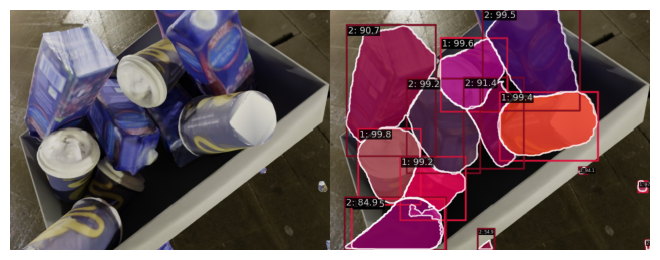

In [67]:
# show the results
visualizer.add_datasample(
    'result',
    img,
    data_sample=result,
    draw_gt=True,
    wait_time=0,
    out_file="inference.jpg",
    pred_score_thr=0.5
)

visualizer.show()